# How old is the average Women Javelin Thrower?

In [1]:
# Data collection (scraping)
import requests
from bs4 import BeautifulSoup as soup
from splinter import Browser

# ChromeDriverManager
from webdriver_manager.chrome import ChromeDriverManager
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)

# Data manipulation
import pandas as pd
from datetime import datetime
import numpy as np

# Data analysis
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.interpolate import make_interp_spline

In [2]:
# Import pingouin for additional statistical analysis
import pingouin as pg
from pingouin import pairwise_ttests

In [3]:
# Import dataframe_image to export df as png
#!pip install dataframe_image
import dataframe_image as dfi

In [4]:
# # Launch Chrome Browser
# executable_path = {'executable_path': ChromeDriverManager().install()}
# browser = Browser('chrome', **executable_path, headless=False)

# ### Collect data from worldathletics.org

# women_url = 'https://worldathletics.org/world-rankings/javelin-throw/women?regionType=world&page=1&rankDate=2023-05-09&limitByCountry=0'
# browser.visit(women_url)

# pages = []
# for i in range(1,6):
#     tables = pd.read_html(f'https://worldathletics.org/world-rankings/javelin-throw/women?regionType=world&page={i}&rankDate=2023-05-09&limitByCountry=0')
#     pages.append(tables)

# frame = pd.DataFrame()
# for page in pages:
#     frame = pd.concat([frame,page[0]],axis=0)

# frame.head(5)

# ### Write dataframe to csv

# frame.to_csv('CSVs/women_javelin_rankings.csv', index=False)

### Read csv file for efficiency upon revisiting analyses

In [5]:
data = pd.read_csv('CSVs/women_javelin_rankings.csv')
df = pd.DataFrame(data)

In [6]:
df

,Place,Competitor,DOB,Nat,Score,Event List
0,1,Kara WINGER,10 APR 1986,USA,1382,Javelin Throw
1,2,Kelsey-Lee BARBER,20 SEP 1991,AUS,1367,Javelin Throw
2,3,Haruka KITAGUCHI,16 MAR 1998,JPN,1357,Javelin Throw
3,4,Mackenzie LITTLE,22 DEC 1996,AUS,1294,Javelin Throw
4,5,Elina TZENGKO,02 SEP 2002,GRE,1269,Javelin Throw
...,...,...,...,...,...,...
495,496,Yu-bin CHOI,06 NOV 2005,KOR,755,Javelin Throw
496,497,Saga KURUNMÄKI,05 JAN 2003,FIN,755,Javelin Throw
497,498,Yasmin WILKE,05 JAN 2003,GER,754,Javelin Throw
498,499,Júlia HANULIAKOVÁ,16 MAY 2000,SVK,754,Javelin Throw


In [7]:
# Define function to calculate current age
def calculate_age(dob):
    """
    Calculates the age based on the date of birth.
    """
    try:
        dob_date = datetime.strptime(str(dob), '%d %b %Y')
        today_date = datetime.today()
        age = today_date.year - dob_date.year - ((today_date.month, today_date.day) < (dob_date.month, dob_date.day))
        return age
    except:
        return np.nan

In [8]:
# Add a new column with the age calculated for each row
df['Age'] = df['DOB'].apply(calculate_age)
df['Age'] = df['Age'].fillna(0)

In [9]:
df.head(5)

,Place,Competitor,DOB,Nat,Score,Event List,Age
0,1,Kara WINGER,10 APR 1986,USA,1382,Javelin Throw,37.0
1,2,Kelsey-Lee BARBER,20 SEP 1991,AUS,1367,Javelin Throw,31.0
2,3,Haruka KITAGUCHI,16 MAR 1998,JPN,1357,Javelin Throw,25.0
3,4,Mackenzie LITTLE,22 DEC 1996,AUS,1294,Javelin Throw,26.0
4,5,Elina TZENGKO,02 SEP 2002,GRE,1269,Javelin Throw,20.0


<AxesSubplot:ylabel='Frequency'>

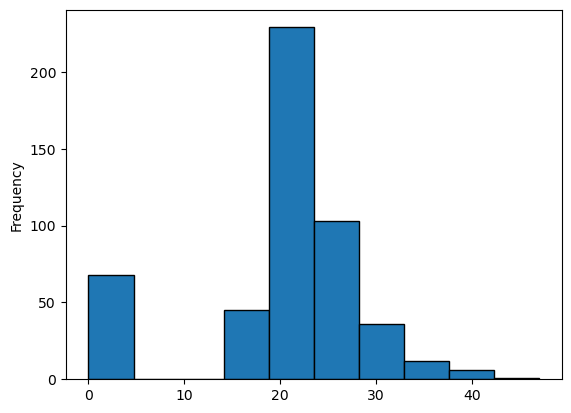

In [10]:
df.Age.plot.hist(edgecolor='black')

In [11]:
df = df[df.Age >= 15]

<AxesSubplot:ylabel='Frequency'>

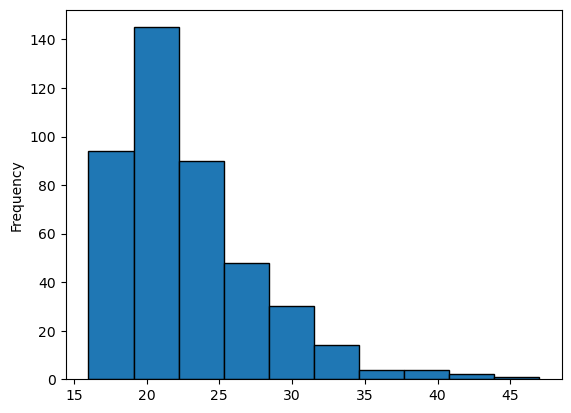

In [13]:
df.Age.plot.hist(edgecolor='black')

### Bin throwers based on world ranking (N bins = 5) model = linear

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
bins = [0, 100, 200, 300, 400, 500]
class_names = ["1st Class", "2nd Class", "3rd Class", "4th Class", "5th Class"]

In [18]:
df["Thrower Class"] = pd.cut(df["Place"], bins, labels=class_names, include_lowest=True)
df

,Place,Competitor,DOB,Nat,Score,Event List,Age,Thrower Class
0,1,Kara WINGER,10 APR 1986,USA,1382,Javelin Throw,37.0,1st Class
1,2,Kelsey-Lee BARBER,20 SEP 1991,AUS,1367,Javelin Throw,31.0,1st Class
2,3,Haruka KITAGUCHI,16 MAR 1998,JPN,1357,Javelin Throw,25.0,1st Class
3,4,Mackenzie LITTLE,22 DEC 1996,AUS,1294,Javelin Throw,26.0,1st Class
4,5,Elina TZENGKO,02 SEP 2002,GRE,1269,Javelin Throw,20.0,1st Class
...,...,...,...,...,...,...,...,...
495,496,Yu-bin CHOI,06 NOV 2005,KOR,755,Javelin Throw,17.0,5th Class
496,497,Saga KURUNMÄKI,05 JAN 2003,FIN,755,Javelin Throw,20.0,5th Class
497,498,Yasmin WILKE,05 JAN 2003,GER,754,Javelin Throw,20.0,5th Class
498,499,Júlia HANULIAKOVÁ,16 MAY 2000,SVK,754,Javelin Throw,22.0,5th Class


### Plot Histogram of Age Overlaying Thrower Classes

In [19]:
data1 = df[df["Thrower Class"] == "1st Class"].Age
data2 = df[df["Thrower Class"] == "2nd Class"].Age
data3 = df[df["Thrower Class"] == "3rd Class"].Age
data4 = df[df["Thrower Class"] == "4th Class"].Age
data5 = df[df["Thrower Class"] == "5th Class"].Age

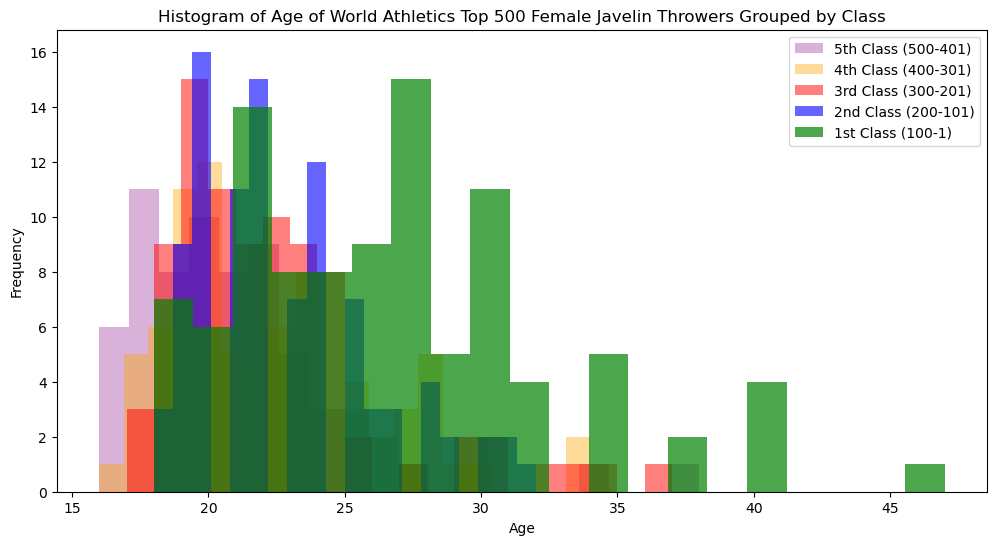

In [23]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the histograms with customizations
plt.hist(data5, bins=20, alpha=0.3, label='5th Class (500-401)', color='purple')
plt.hist(data4, bins=20, alpha=0.4, label='4th Class (400-301)', color='orange')
plt.hist(data3, bins=20, alpha=0.5, label='3rd Class (300-201)', color='red')
plt.hist(data2, bins=20, alpha=0.6, label='2nd Class (200-101)', color='blue')
plt.hist(data1, bins=20, alpha=0.7, label='1st Class (100-1)', color='green')

# Add labels and a legend
plt.title("Histogram of Age of World Athletics Top 500 Female Javelin Throwers Grouped by Class")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Save the plot
plt.savefig("Histogram_Women_Javelin.png")

# Show the plot
plt.show()

In [21]:
# Use pingouin to perform pairwise ttests 
pairwise = pg.pairwise_gameshowell(data=df, dv='Age', between='Thrower Class').sort_values(['pval'], ascending = True).set_index('A')
pairwise

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
1st Class,5th Class,26.727273,21.285714,5.441558,0.742123,7.332423,166.768525,9.312606e-11,1.069555
1st Class,3rd Class,26.727273,21.847059,4.880214,0.718381,6.793355,173.931372,1.669414e-09,0.973230
1st Class,4th Class,26.727273,22.111111,4.616162,0.716834,6.439649,171.341430,1.159944e-08,0.924164
1st Class,2nd Class,26.727273,22.814433,3.912840,0.664864,5.885176,155.486159,2.349986e-07,0.833112
2nd Class,5th Class,22.814433,21.285714,1.528719,0.571138,2.676620,131.612552,6.294654e-02,0.430372
2nd Class,3rd Class,22.814433,21.847059,0.967374,0.539928,1.791671,163.155442,3.819469e-01,0.268466
4th Class,5th Class,22.111111,21.285714,0.825397,0.630877,1.308332,144.958204,6.864903e-01,0.212743
2nd Class,4th Class,22.814433,22.111111,0.703322,0.537869,1.307607,157.711820,6.869025e-01,0.198866
3rd Class,5th Class,21.847059,21.285714,0.561345,0.632634,0.887314,147.906458,9.012071e-01,0.142369


In [22]:
significant = pairwise[pairwise.pval <= .05]
significant

,B,mean(A),mean(B),diff,se,T,df,pval,hedges
A,,,,,,,,,
1st Class,5th Class,26.727273,21.285714,5.441558,0.742123,7.332423,166.768525,9.312606e-11,1.069555
1st Class,3rd Class,26.727273,21.847059,4.880214,0.718381,6.793355,173.931372,1.669414e-09,0.973230
1st Class,4th Class,26.727273,22.111111,4.616162,0.716834,6.439649,171.341430,1.159944e-08,0.924164
1st Class,2nd Class,26.727273,22.814433,3.912840,0.664864,5.885176,155.486159,2.349986e-07,0.833112


In [24]:
significant_trimmed = significant[["B", "mean(A)", "mean(B)", "diff", "pval"]]
significant_trimmed

,B,mean(A),mean(B),diff,pval
A,,,,,
1st Class,5th Class,26.727273,21.285714,5.441558,9.312606e-11
1st Class,3rd Class,26.727273,21.847059,4.880214,1.669414e-09
1st Class,4th Class,26.727273,22.111111,4.616162,1.159944e-08
1st Class,2nd Class,26.727273,22.814433,3.912840,2.349986e-07


In [25]:
dfi.export(significant_trimmed, 'significant_pairwise_ttest_results_women_javelin.png')

### Add gender classifier to df before export as csv for comparative analysis

In [26]:
df["Gender"] = 'Female'
df.head(3)

,Place,Competitor,DOB,Nat,Score,Event List,Age,Thrower Class,Gender
0,1,Kara WINGER,10 APR 1986,USA,1382,Javelin Throw,37.0,1st Class,Female
1,2,Kelsey-Lee BARBER,20 SEP 1991,AUS,1367,Javelin Throw,31.0,1st Class,Female
2,3,Haruka KITAGUCHI,16 MAR 1998,JPN,1357,Javelin Throw,25.0,1st Class,Female


In [28]:
df.to_csv('CSVs/women_df.csv', index=False)